In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import OrderedDict 

In [2]:
def inrange(N):
    for i in range(N):
        i
    
    return None


def listrange(N):
    list(range(N))
    
    return None


def listappend(N):
    lista = []
    
    for i in range(N):
        lista.append(i)

    return None


def nparange(N):
    np.arange(N)
    
    return None


def npappend(n):
    nparray = np.array([])
    
    for i in range(N):
        nparray = np.append(nparray, i)
    
    return None


def time1(n,func):
    x = np.zeros(n)
    y = np.zeros(n)
    factor = 1e6 ## Converts units of seconds to units of microseconds
    
    for k in range(n):
        N = (2**8) * k
        time_it = %timeit -q -n 16 -o func(N)
        x[k] = N
        y[k] = time_it.best * factor
        print('\rComputed',k+1,'loops',end='')
            
    return x, y


def plot(x,y,title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r_squared = r_value**2
    
    plt.title(title)
    plt.xlabel('N')
    plt.ylabel('Time ($\mu$s)')
    plot = plt.plot(x, y, 'o:', label='data')    
    plt.plot(x, x*slope + intercept, label='lin regress')
    
    plt.legend(loc='best')
    
    return plt.show(plot), print('r^2:',r_squared,'\nslope:',slope)

Computed 16 loops

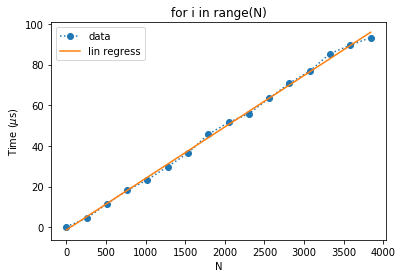

r^2: 0.9981476601541871 
slope: 0.02532664577144484
Computed 16 loops

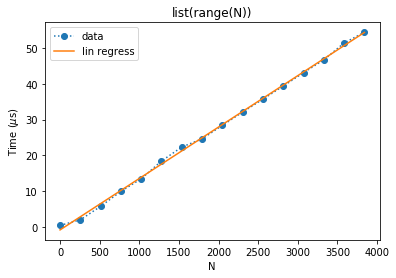

r^2: 0.9986914092155965 
slope: 0.014385770940496827
Computed 16 loops

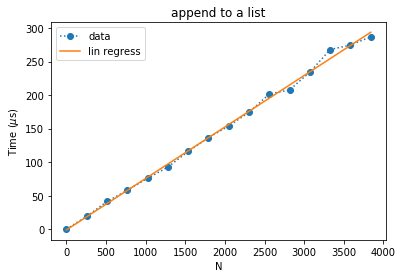

r^2: 0.9972581273506519 
slope: 0.07668295469198018
Computed 16 loops

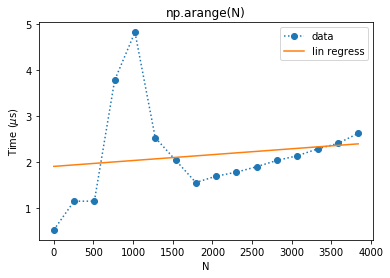

r^2: 0.02315260211953716 
slope: 0.00012770704755131888
Computed 16 loops

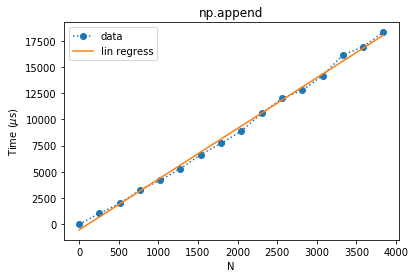

r^2: 0.9969237096322102 
slope: 4.830904146062706


In [5]:
n = 16

title_func = OrderedDict([
    ('for i in range(N)' , inrange),
    ('list(range(N))' , listrange),
    ('append to a list' , listappend),
    ('np.arange(N)' , nparange),
    ('np.append' , npappend)
])


for title, func in title_func.items():
    plot(*time1(n,func),title)